In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import pickle


In [2]:
resultsList = glob.glob(r'/tigress/MMURTHY/Kyle/code/edna/results/**/multi_results.pkl')

In [3]:
resultsList

['/tigress/MMURTHY/Kyle/code/edna/results/AD_control/multi_results.pkl',
 '/tigress/MMURTHY/Kyle/code/edna/results/AD_control_BD/multi_results.pkl',
 '/tigress/MMURTHY/Kyle/code/edna/results/blind_deaf/multi_results.pkl',
 '/tigress/MMURTHY/Kyle/code/edna/results/LC31_Kir/multi_results.pkl',
 '/tigress/MMURTHY/Kyle/code/edna/results/blind/multi_results.pkl',
 '/tigress/MMURTHY/Kyle/code/edna/results/vpoEN_Kir/multi_results.pkl',
 '/tigress/MMURTHY/Kyle/code/edna/results/deaf/multi_results.pkl']

In [4]:
ftrlist = ['mFV', 'mLS', 'fFV', 'fLS', 'mfDist', 'mfAng', 'fmAng', 'pulse', 'sine']
plotdf = pd.DataFrame(columns=['group', 'ftr', 'coef'])

for file in resultsList:
    group = os.path.basename(os.path.dirname(file))
    with open(file, 'rb') as f:
        data = pickle.load(f)
    for i in range(len(data)):
        for ii in range(len(data.filter_norms[i])):
            plotdf.loc[len(plotdf.index)] = [group, ftrlist[ii], data.filter_norms[i][ii]]

In [5]:
group1 = plotdf[plotdf.group.isin(['AD_control', 'LC31_Kir', 'vpoEN_Kir'])]
group2 = plotdf[plotdf.group.isin(['AD_control_BD', 'blind', 'deaf', 'blind_deaf'])]

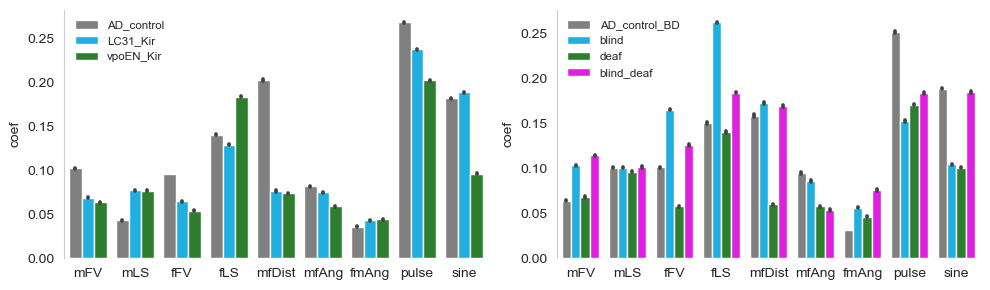

In [9]:
plt.figure(figsize=(10,3))
plt.subplot(121)
sns.barplot(data=group1, x='ftr', y='coef', hue='group',
            palette=['gray', 'deepskyblue', 'forestgreen'],
            hue_order=['AD_control', 'LC31_Kir', 'vpoEN_Kir'])
plt.legend(fontsize='small', frameon=False)
plt.grid(False)
plt.xlabel('')
sns.despine(bottom=True)
plt.subplot(122)
sns.barplot(data=group2, x='ftr', y='coef', hue='group',
            palette=['gray', 'deepskyblue', 'forestgreen', 'magenta'],
            hue_order=['AD_control_BD', 'blind', 'deaf', 'blind_deaf'])
plt.legend(fontsize='small', frameon=False)
plt.grid(False)
sns.despine(bottom=True)
plt.xlabel('')
plt.tight_layout()
plt.savefig(r'/run/user/1000/gvfs/smb-share:server=tigress-cifs.princeton.edu,share=fileset-mmurthy/Kyle/code/edna/results/multiGLM.png')

In [25]:
savepath = rf'/tigress/MMURTHY/Kyle/code/edna'
groupname = 'test'
# print(groupname, len(exptList))

# features, output = design(exptList)
saveFtr = os.path.join(savepath, f'results/{groupname}/features.pkl')
saveoutput = os.path.join(savepath, f'results/{groupname}/output.pkl')
print(saveFtr)

/tigress/MMURTHY/Kyle/code/edna/results/test/features.pkl


In [117]:
for file in resultsList:
    group = os.path.basename(os.path.dirname(file))
    with open(file, 'rb') as f:
        data = pickle.load(f)

    break

In [127]:
filters = data.group_filters.to_numpy()

In [143]:
avgs = []
for i in range(9):
    ftravg = []
    for trial in filters:
        ftravg.append(trial[i])
    avgs.append(np.mean(np.array(ftravg), axis=0))


In [146]:
avgs = np.array(avgs)

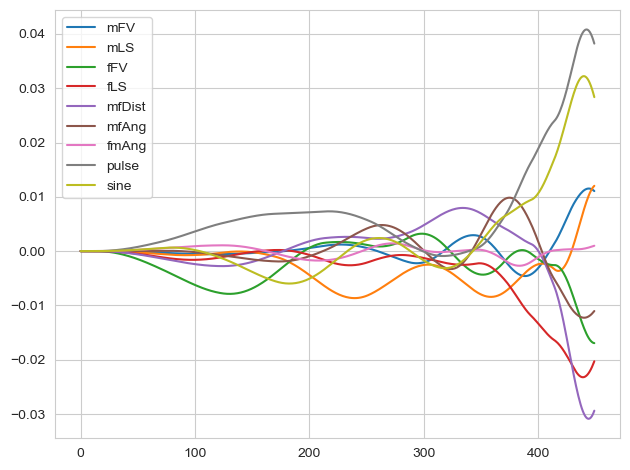

In [150]:
plt.plot(avgs.T)
plt.legend(labels=ftrlist)
plt.tight_layout()